In [1]:
from clarifai.rest import ClarifaiApp
app = ClarifaiApp(api_key='f9c874a9098c4ade9ea857a4b955cee0')
      
# get the general model
model = app.models.get("face-v1.3")
      
# predict with the model
results = model.predict_by_url(url='https://samples.clarifai.com/face-det.jpg')

In [2]:
list_dic = []
for regions in results['outputs'][0]['data']['regions']:
    list_dic.append(regions['region_info']['bounding_box'])

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import urllib.request
PATH = 'https://samples.clarifai.com/face-det.jpg'

resp = urllib.request.urlopen(PATH)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

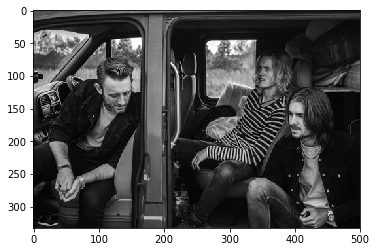

In [4]:
plt.imshow(image)
plt.show()

In [5]:
def addBoxes (image, list_dic):
    img_copy = image.copy()
    img_height, img_width, img_channels = image.shape
    for item in list_dic:
        x = np.float32(item['left_col'] * img_width)
        y = np.float32(item['top_row'] * img_height)
        w = np.float32((item['right_col'] * img_width) - (item['left_col'] * img_width))
        h = np.float32((item['bottom_row'] * img_height) - (item['top_row'] * img_height))
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    return img_copy

In [6]:
image_with_boxes = addBoxes (image,list_dic)

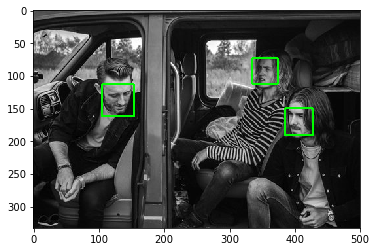

In [7]:
plt.imshow(image_with_boxes)
plt.show()